# Orbits of rotations

By default, we will represent points in the circle by numbers in the interval $[0,1)$. The following function converts from these coordinates to the unit circle.

In [4]:
def to_unit_circle(x):
    return (cos(2*pi*x), sin(2*pi*x))

Here is an example of the use of the function above:

In [5]:
to_unit_circle(0)

(1, 0)

Note that the output of the last command in a block is automatically printed in Jupyter.

In [7]:
to_unit_circle(1/4)

(0, 1)

In [8]:
to_unit_circle(1)

(1, 0)

The following function returns the rotation of the circle by alpha.

In [9]:
def rotation(alpha):
    def T(x):
        val = x+alpha
        return val - floor(val)
    return T

The following constructs the rotation by 2/5:

In [10]:
T = rotation(2/5)

Here we test it:

In [11]:
T(0)

2/5

In [12]:
T(4/5)

1/5

The following is a function that computes the forward orbit of $x$ under $T$ up until time $N$. So, this returns the list of values
$$[x,T(x), \ldots, T^N(x)].$$

In [13]:
def forward_orbit(x, T, N):
    orbit = [x] # Start of the orbit.
    y = x
    for i in range(N):
        y = T(y) # Redefine y to be T(y)
        orbit.append(y) # Add y at the end of the orbit.
    return orbit

Here we see that $0$ has a periodic orbit of least period $5$:

In [14]:
orbit = forward_orbit(0,T,5)
orbit

[0, 2/5, 4/5, 1/5, 3/5, 0]

The following converts orbit into circle coordinates:

In [15]:
circle_orbit = [to_unit_circle(x) for x in orbit]
circle_orbit

[(1, 0),
 (-1/4*sqrt(5) - 1/4, 1/4*sqrt(-2*sqrt(5) + 10)),
 (1/4*sqrt(5) - 1/4, -1/4*sqrt(2*sqrt(5) + 10)),
 (1/4*sqrt(5) - 1/4, 1/4*sqrt(2*sqrt(5) + 10)),
 (-1/4*sqrt(5) - 1/4, -1/4*sqrt(-2*sqrt(5) + 10)),
 (1, 0)]

We can plot the `circle_orbit`:

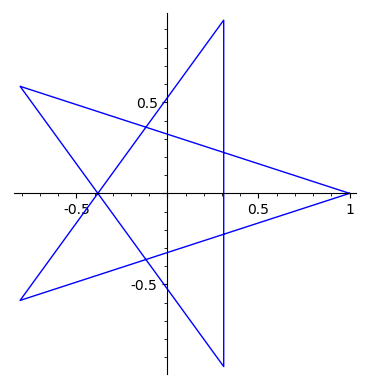

In [16]:
line2d(circle_orbit, aspect_ratio=1)

Here we plot two orbits:

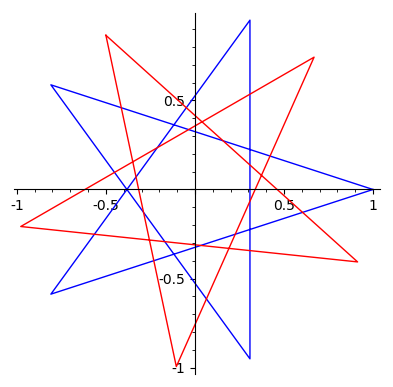

In [17]:
plt1 = line2d(circle_orbit, aspect_ratio=1)
orbit2 = forward_orbit(1/3, T, 5)
circle_orbit2 = [to_unit_circle(x) for x in orbit2]
plt2 = line2d(circle_orbit2, aspect_ratio=1, color="red")
plt1 + plt2 # Addition combines plots

## An irrational orbit:

Sage can do exact arithmetic in the field `AA` of all algebraic reals. For more infromation on `AA` see:
http://doc.sagemath.org/html/en/reference/number_fields/sage/rings/qqbar.html.

In [18]:
AA

Algebraic Real Field

In [19]:
alpha = AA(sqrt(2)-1)
alpha

0.4142135623730951?

In [20]:
T = rotation(alpha)

In [21]:
T(0)

0.4142135623730951?

In [22]:
orbit = forward_orbit(0,T,100)

In [23]:
circle_orbit = [to_unit_circle(x) for x in orbit]

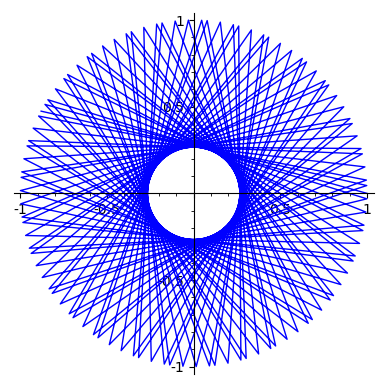

In [24]:
line2d(circle_orbit, aspect_ratio=1)

Of course, the full infinitely long forward orbit of any point is dense, as we will prove in class. Also see Devaney's Theorem 3.13.